In [1]:
%load_ext autoreload
%autoreload 2

from vae_module import VAE
import torch
from torch.utils.data import DataLoader

from dataset import get_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vae_training import calculate_sample_probabilities


wandb: Currently logged in as: jacob314. Use `wandb login --relogin` to force relogin


In [2]:

device = torch.device("cuda:3") if torch.cuda.is_available() else torch.device("cpu")

model = VAE.load_from_checkpoint('./bias-skin-lesion-detection/1mg69vwh/checkpoints/vae-final.cpkt', map_location=device)

mean = [194.7155, 139.2602, 145.4779]
std = [36.0167, 38.9894, 43.4381]
def denormalize_image(image):
    image = image.cpu().detach().permute(1, 2, 0).numpy()
    image = image * std + mean
    image = image.astype(np.uint8)
    return image

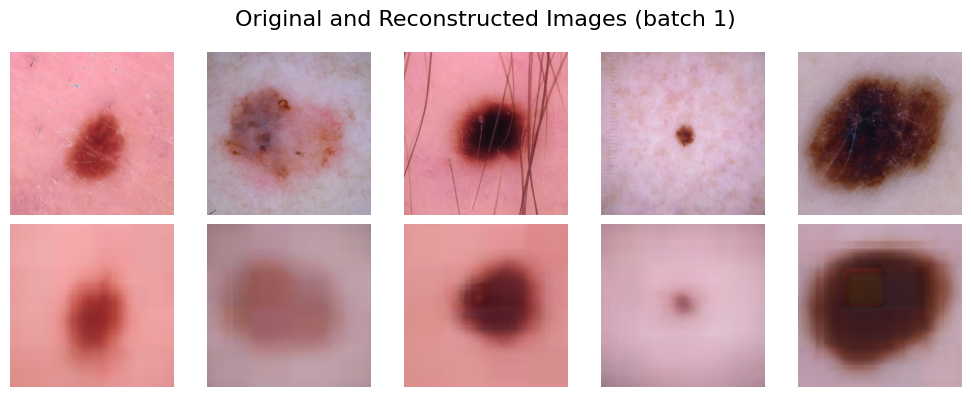

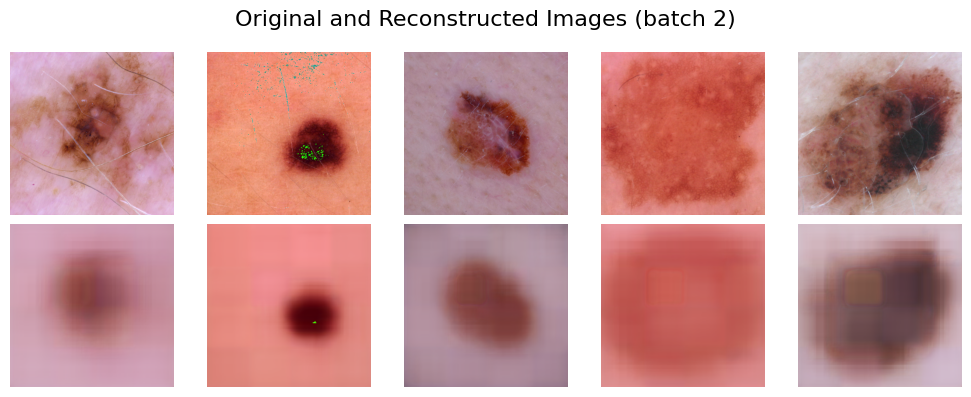

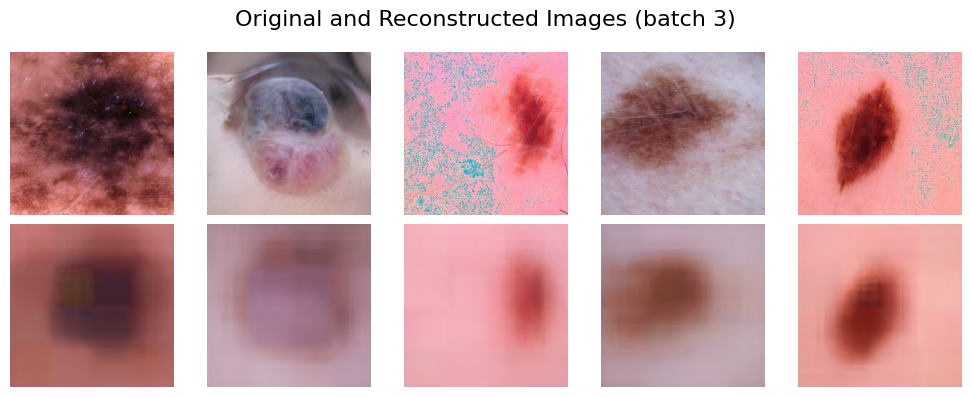

In [3]:
# Visualize some images from the validation set

val_set = get_dataset(dataset_name = "train", under_sampling=True)
val_loader = DataLoader(val_set, batch_size=5, shuffle=True, drop_last=False, num_workers=1)
counter = 1
for batch in val_loader:
    imgs, labels = batch
    imgs = imgs.to(device)
    original_imgs = imgs
    
    recon_imgs = model.forward(imgs)
    
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    
    # add original images
    for i, ax in enumerate(axes[0]):
        image = denormalize_image(original_imgs[i])
        ax.imshow(image)
        ax.axis('off')

    # add reconstructed images
    for i, ax in enumerate(axes[1]):
        image = denormalize_image(recon_imgs[i])
        ax.imshow(image)
        ax.axis('off')
        
    plt.suptitle(f"Original and Reconstructed Images (batch {counter})", fontsize=16)
    plt.tight_layout()

    plt.show()

    counter += 1
    if counter >= 4:
        break

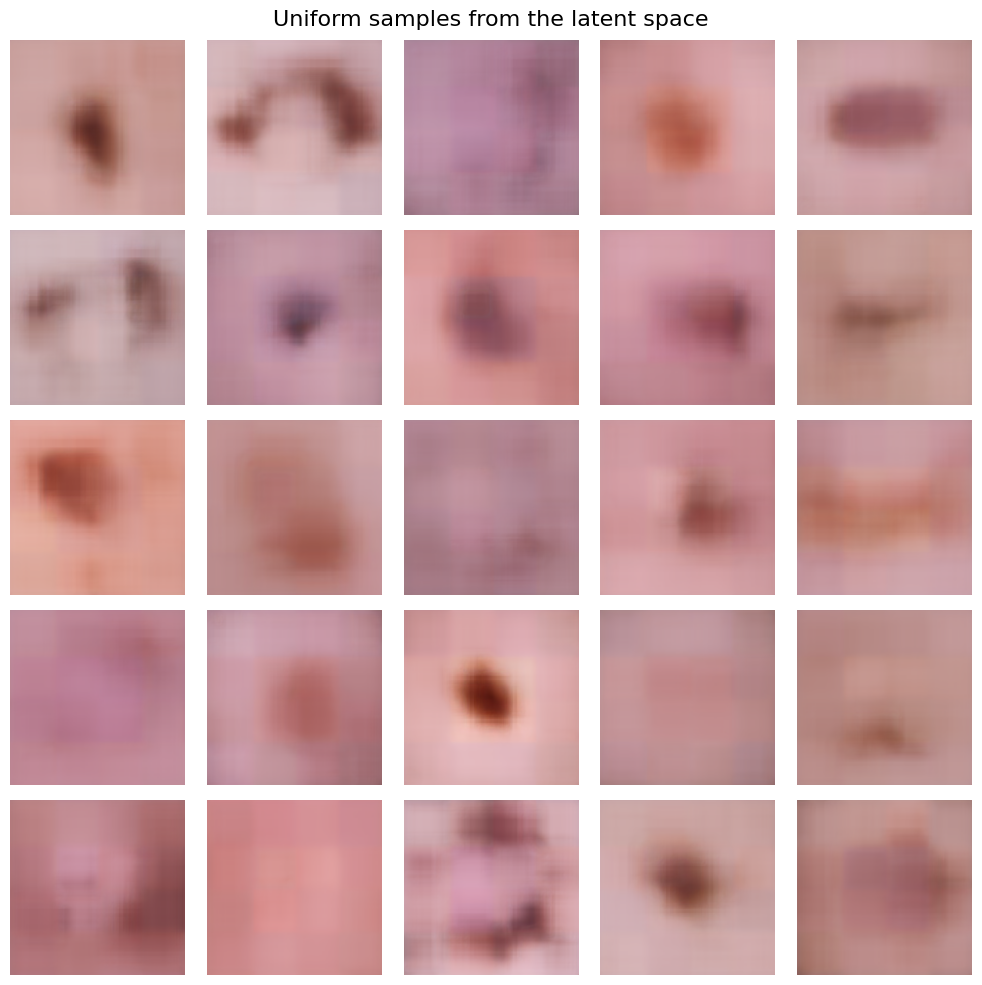

In [4]:
# Visualize random samples from the latent space

num_samples = 25
random_imgs = model.generate_samples(num_samples)
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# add original images
for i, ax in enumerate(axes.flat):
    image = denormalize_image(random_imgs[i])
    ax.imshow(image)
    ax.axis('off')

plt.suptitle("Uniform samples from the latent space", fontsize=16)
plt.tight_layout()

plt.show()

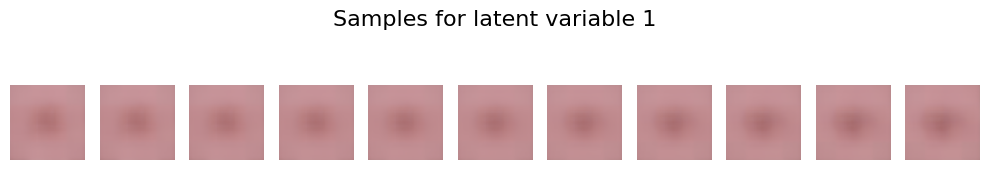

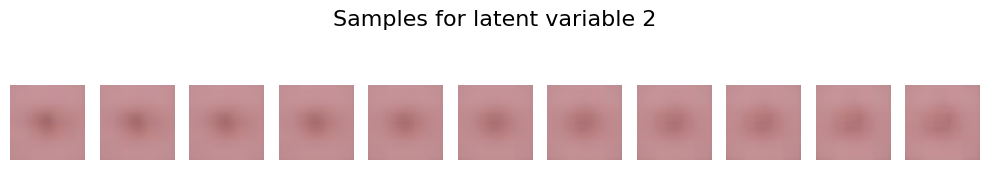

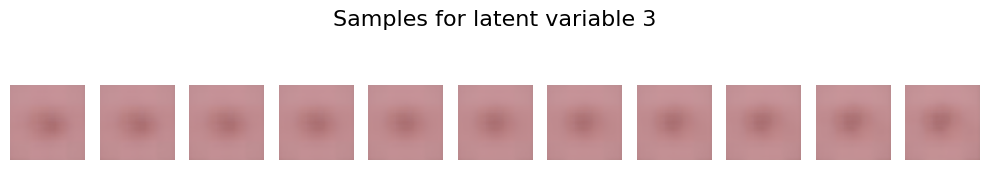

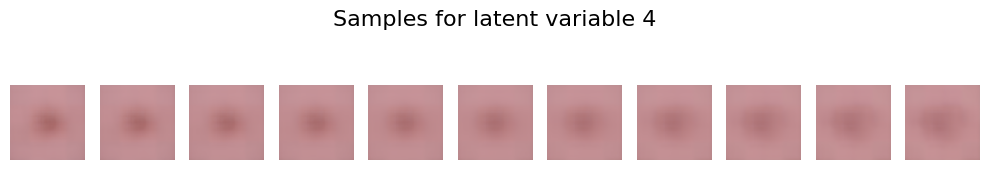

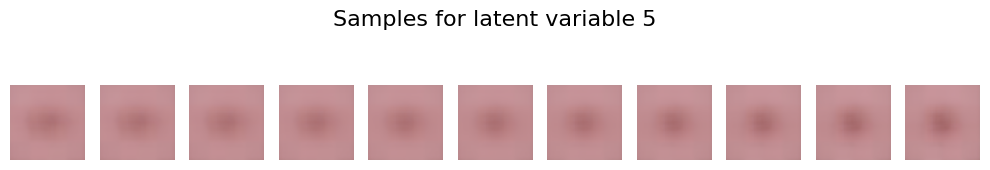

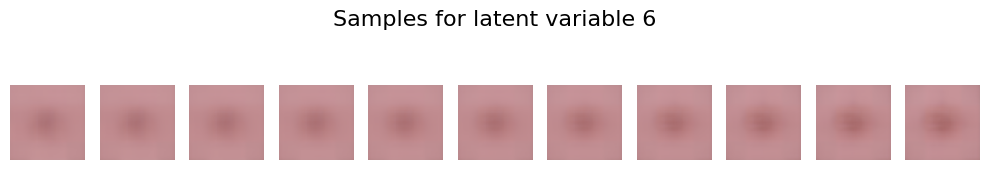

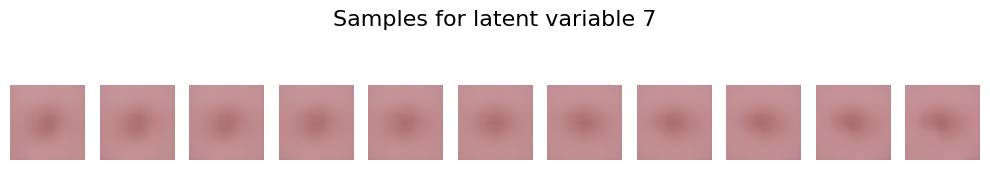

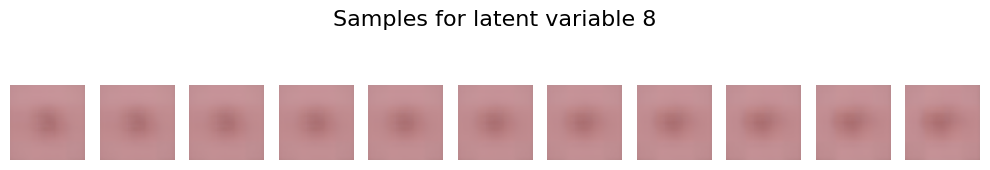

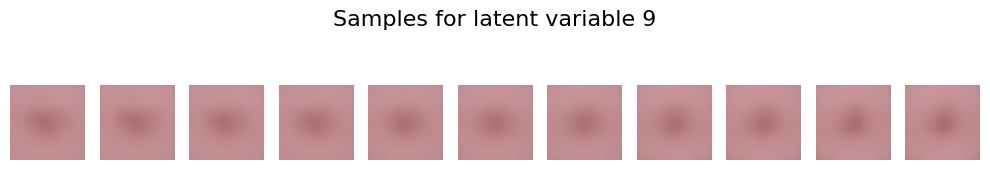

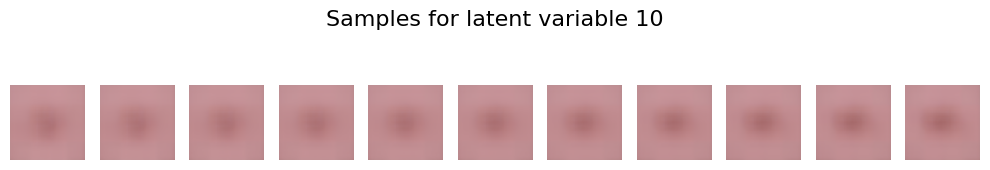

In [5]:
# Visualize samples for each latent variable

for i in range(10):
    
    latent_variable = i

    random_imgs = model.generate_samples_for_latent_variable(latent_variable)

    fig, axes = plt.subplots(1, 11, figsize=(10, 2))

    for i, ax in enumerate(axes.flat):
        image = denormalize_image(random_imgs[i])
        ax.imshow(image)
        ax.axis('off')

    plt.suptitle(f"Samples for latent variable {latent_variable + 1}", fontsize=16)
    plt.tight_layout()

    plt.show()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/matplotlib/patches.py:738: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/home/jschaefer/mitigating-bias-in-skin-lesion-detection-models/jsvenv/lib/python3.10/site-packages/matplotlib/transforms.py:2041: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


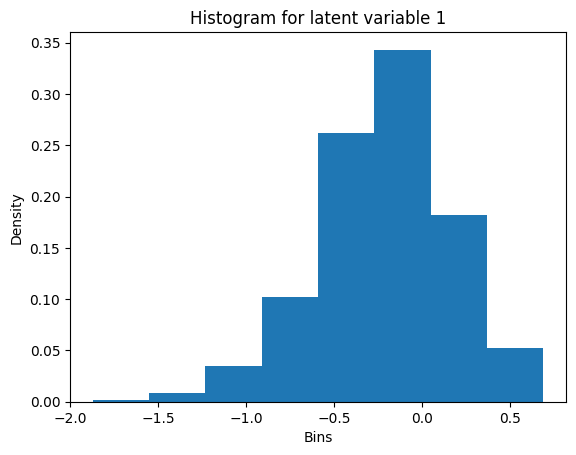

0.49999999999999994


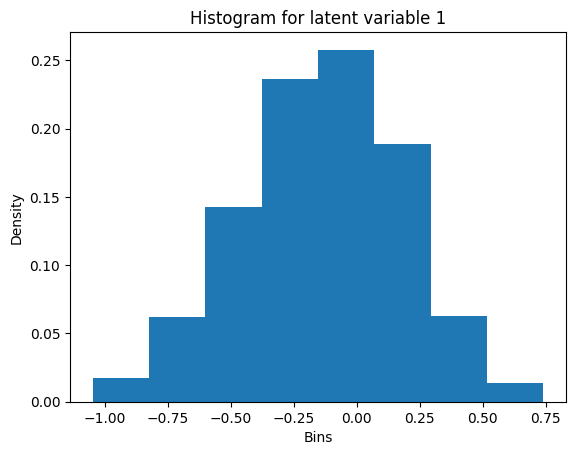

0.5
[1.43277449e-04 6.18059786e-05 1.43277468e-04 ... 8.86387089e-05
 6.02743193e-04 6.02743183e-04]
['ISIC_0024310' 'ISIC_0024313' 'ISIC_0024315' ... 'ISIC_0025930'
 'ISIC_0025931' 'ISIC_0025933']


In [7]:
val_sample_p, val_isic_ids = calculate_sample_probabilities("train", model, True, num_classes=2)

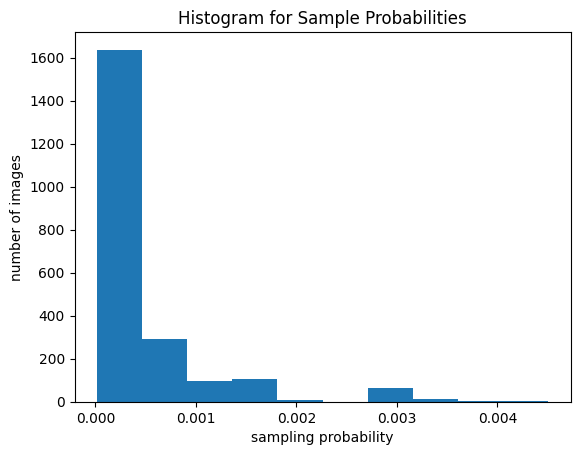

In [8]:
# Plot sample probabilities
bins=10
hist_density, bin_edges =  np.histogram(val_sample_p, density=False, bins=bins)
plt.bar(bin_edges[:-1], hist_density, width=np.diff(bin_edges), align='edge')
plt.xlabel('sampling probability')
plt.ylabel('number of images')
plt.title("Histogram for Sample Probabilities")
plt.show()

[1.43277449e-04 6.18059786e-05 1.43277468e-04 ... 8.86387089e-05
 6.02743193e-04 6.02743183e-04]
[2012   47 1259  638 2046  306   56  545  848  279 1930 2175 2066 1255
  909  158 1788  565   87  625 1565  805 1790  259  166    6   85 1704
 1785  131  239  315 2013 2002  676  507 1641 1481  370 1883]
ISIC_0025625
ISIC_0024865
ISIC_0024532
ISIC_0031953
ISIC_0025673
ISIC_0027832
ISIC_0024932
ISIC_0030689
ISIC_0033180
ISIC_0027487
ISIC_0025496
ISIC_0025866
ISIC_0025701
ISIC_0024528
ISIC_0033429
ISIC_0026150
ISIC_0025290
ISIC_0030932
ISIC_0025265
ISIC_0031746
ISIC_0024989
ISIC_0032982
ISIC_0025293
ISIC_0027260
ISIC_0026247
ISIC_0024367
ISIC_0025238
ISIC_0025176
ISIC_0025287
ISIC_0025766
ISIC_0027100
ISIC_0028017
ISIC_0025626
ISIC_0025609
ISIC_0032287
ISIC_0030171
ISIC_0025093
ISIC_0024856
ISIC_0028512
ISIC_0025435


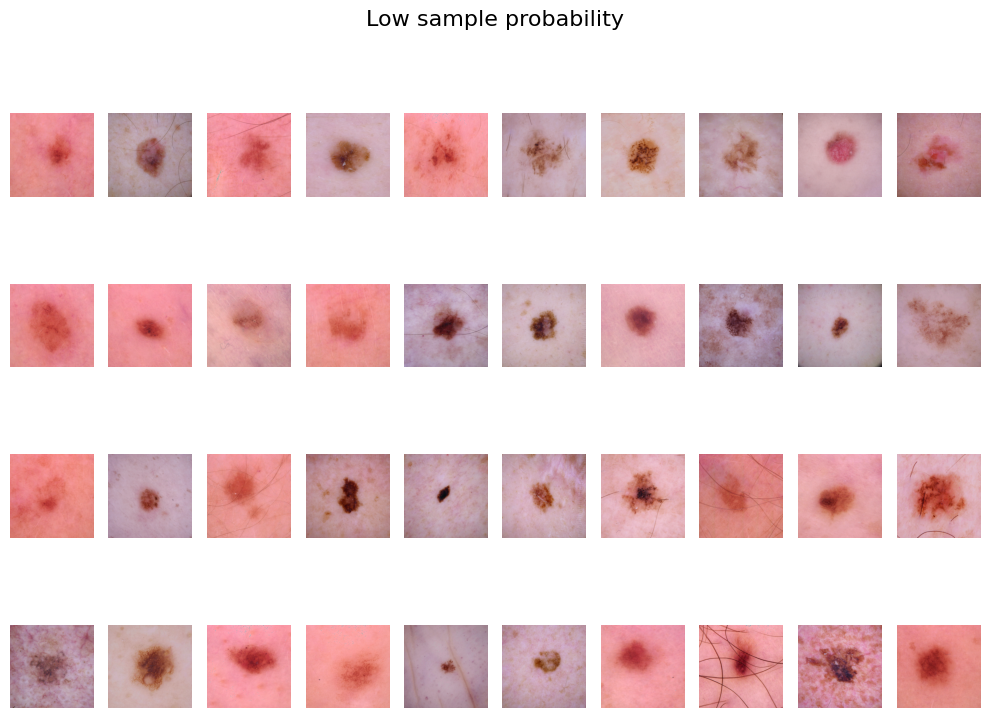

[  17  185  599  921 1094  519  908   72  782  241  400  458  548  109
  879  795  511  354  825 2019 1709 1343 1195  929  483  951  215  778
  637   83  459 1504 1689  654  740  345 1607 1986   89   64]
ISIC_0024545
ISIC_0026531
ISIC_0031408
ISIC_0033479
ISIC_0034233
ISIC_0030333
ISIC_0033428
ISIC_0025105
ISIC_0032888
ISIC_0027102
ISIC_0028901
ISIC_0029574
ISIC_0030754
ISIC_0025524
ISIC_0033299
ISIC_0032940
ISIC_0030211
ISIC_0028361
ISIC_0033061
ISIC_0025635
ISIC_0025184
ISIC_0024653
ISIC_0024429
ISIC_0033522
ISIC_0029914
ISIC_0033611
ISIC_0026892
ISIC_0032873
ISIC_0031941
ISIC_0025234
ISIC_0029575
ISIC_0024891
ISIC_0025161
ISIC_0032098
ISIC_0032690
ISIC_0028228
ISIC_0025047
ISIC_0025581
ISIC_0025277
ISIC_0024972


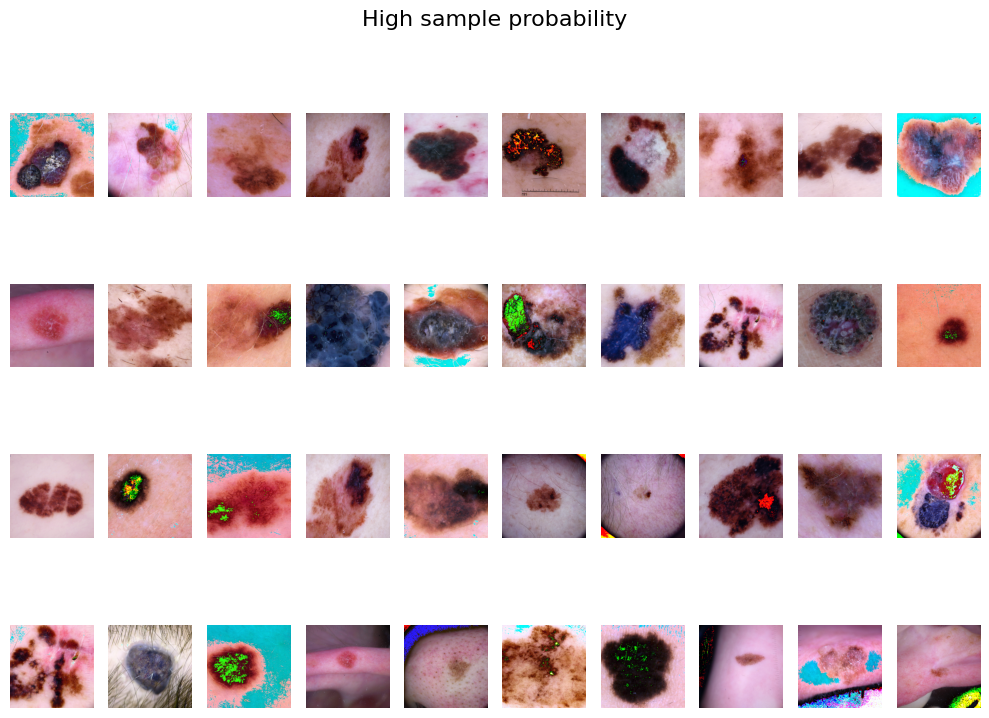

In [9]:
# Plot images with high and low sampling probability
print(val_sample_p)
argmins = np.argsort(val_sample_p)[:40]
print(argmins)

fig, axes = plt.subplots(4, 10, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    isic_id = val_isic_ids[argmins[i]]
    print(isic_id)
    image = val_set.get_image_from_isic_id(isic_id)
    image = denormalize_image(image)
    ax.imshow(image)
    ax.axis('off')

plt.suptitle(f"Low sample probability", fontsize=16)
plt.tight_layout()
plt.show()



argmaxs = np.argsort(val_sample_p)[-40:]
print(argmaxs)

fig, axes = plt.subplots(4, 10, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    isic_id = val_isic_ids[argmaxs[i]]
    print(isic_id)
    image = val_set.get_image_from_isic_id(isic_id)
    image = denormalize_image(image)
    ax.imshow(image)
    ax.axis('off')

plt.suptitle(f"High sample probability", fontsize=16)
plt.tight_layout()
plt.show()



In [10]:
# write probabilities to csv file

data_dict = {"isic_id": val_isic_ids, "sample_probability":val_sample_p.tolist()}
dataframe = pd.DataFrame(data_dict)
dataframe.to_csv("./train_sample_probabilities.csv")

In [38]:
train_sample_p, train_isic_ids = calculate_sample_probabilities("train", model, num_classes=2)

data_dict = {"isic_id": train_isic_ids, "sample_probability": train_sample_p.tolist()}
dataframe = pd.DataFrame(data_dict)
dataframe.to_csv("./train_sample_probabilities.csv")


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
0.25
0.25000000000000006
0.25
0.25
[3.03689642e-05 1.30820153e-04 4.25165542e-05 ... 6.81908398e-05
 5.45526657e-04 2.04572513e-04]
['ISIC_0024310' 'ISIC_0024313' 'ISIC_0024315' ... 'ISIC_0034303'
 'ISIC_0034315' 'ISIC_0034318']


In [14]:
## Other version from UVA:

# A placeholder for the sampling probabilities for the images.
training_sample_p = np.zeros(latent_repr.shape[0])

# Consider the distribution for each latent variable.
for i in range(256):
    # Extract the latent means of the respective latent dimension.
    latent_distribution = latent_repr[:, i].cpu()

    # Generate a histogram of the latent distribution.
    hist_density, bin_edges = np.histogram(latent_distribution, density=True, bins=bins)

    # Set the boundaries of the bins to -/+ infinity.
    bin_edges[0] = -float("inf")
    bin_edges[-1] = float("inf")
    # Use the digitize function to see in which bin each sample falls.
    bin_idx = np.digitize(latent_distribution, bin_edges)

    # Convert the hist density to a probability of the respective bin.
    hist_bin_probability = hist_density / np.sum(hist_density)

    # Invert the density function to compute the sampling probability!
    sample_probabilities = 1.0 / (hist_bin_probability[bin_idx - 1] + smoothing_fac)
    # Add 1 to remove negative probabilities and use Log Sum Trick
    log_sample_probabilities = np.log(sample_probabilities + 1)

    # At the end.
    training_sample_p += log_sample_probabilities

# Overall normalization.
training_sample_p /= np.sum(training_sample_p)
print(training_sample_p)

# Plot a hist of current sample probabilities and image samples of the bins.
#self.plot_sample_prob_hist(training_sample_p.copy(), images, bins, epoch, model_name)


NameError: name 'latent_repr' is not defined